# Business Understanding

Generally, data scientists use to spend majority of their time cleaning and exploring data. It is advisable to follow the **CRISP-DM process (Cross Industry Process for Data Mining)** which helps us to streamline our project, making our work easy to understand and ready for deployment. 

For this project, we are requested to find solutions and create our first blog post to share our questions and insights with non-technical audience like most data scientists did. We picked multiple years of Stack Overflow survey data to analyze how work culture, recruitment and compensation package for developers over the years. To narrow down our scope of analysis, we decided to explore trends happened before and after global pandemic by using Stack Overflow Data - 2019 Survey and 2023 Survey to answer 3 business questions. 

- Did work culture around the world changed before and after global pandemic? 
- Which are the countries adopted remote work culture after global pandemic?
- Is the number of developer increase after global pandemic?

# Data Understanding

In order to get a better understanding of the data, we access and explore data to take a look at some of the characteristics of the dataset.

### Read in data and load necessary libraries
First, we load all the necessary libraries and Stack Overflow Data - Survey 2019 and Survey 2023 datasets into a pandas dataframe and print its statistics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
%matplotlib inline

df2023 = pd.read_csv('./survey_results_public_2023.csv')
df2019 = pd.read_csv('./survey_results_public_2019.csv')

df2023.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [2]:
# To gain an overview of Survey Data 2023
print("There are {0} rows and {1} columns in Stack Overflow Survey Data - 2023".format(df2023.shape[0], df2023.shape[1]))
df2023.describe()

There are 89184 rows and 84 columns in Stack Overflow Survey Data - 2023


,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [3]:
# To gain an overview of Survey Data 2019
print("There are {0} rows and {1} columns in Stack Overflow Survey Data - 2019".format(df2019.shape[0], df2019.shape[1]))
df2019.describe()

There are 88883 rows and 85 columns in Stack Overflow Survey Data - 2019


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


Overall, there are more questions blasted in the survey conducted in 2019 and more responses collected as well. In this project, we will only be using selected number of variables in Survey Data 2019 that matching Survey Data 2023 for trend analysis.

# Prepare Data

It is uncommon to work from home in many countries before global pandemic. The declaration of COVID-19 pandemic since Jan 2020 caused severe social disruption around the world with reduced human activity and many white collars worked from home instead of working in office.  
To answer Question 1, I will

1. Look at RemoteWork (Survey Data 2023) / WorkRemote (Survey Data 2019) and Country column.
2. Classify the value of WorkRemote into 3 categories - Remote, In-person, Hybrid (refer to RemoteWork column in Survey Data 2023)
3. Create a horizontal bar plot to compare the trend of working culture in 2019 vs 2023.

In [4]:
# Remove rows associated with NaN values for Country and RemoteWork/WorkRemote columns
df2023_rw = df2023.dropna(subset=['Country', 'RemoteWork'], axis=0)
df2019_rw = df2019.dropna(subset=['Country', 'WorkRemote'], axis=0)

# Calculate the proportion of individuals in each RemoteWork category of Survey Data 2023
work2023_vals = df2023_rw.RemoteWork.value_counts().sort_index()

Although similar question had been asked in both survey, the description of responses captured in 2019 survey is different compared to 2023 survey. To standardize the value of each work culture, we create a function to classify it into 3 categories so that we can compare both datasets to observe the changes on work culture.

In [5]:
def classify_work_culture (df):
    """
    PURPOSE
        Classify type of work culture into new categorical variable - WorkCulture 
   
    INPUT
        df - a dataframe holding WorkRemote column
        
    OUTPUT
        df - a dataframe with new column "WorkCulture"
    """

    for ind, val in df.iterrows():
        # Match each value to its respective category
        if val['WorkRemote'] == "Less than once per month / Never":
            df.at[ind, 'WorkCulture'] = "In-person"
        elif val['WorkRemote'] == "All or almost all the time (I'm full-time remote)":
            df.at[ind, 'WorkCulture'] = "Remote"
        else:
            df.at[ind, 'WorkCulture'] = "Hybrid (some remote, some in-person)"
    
    return df

In [6]:
# Classify work culture of each individuals in Survey Data 2019
df2019_rw = classify_work_culture(df2019_rw)

# Calculate the proportion of individuals in each category of Survey Data 2019
work2019_vals = df2019_rw.WorkCulture.value_counts().sort_index()

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_8007/1948151821.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[ind, 'WorkCulture'] = "In-person"


# Question 1: Did work culture around the world changed before and after global pandemic?  

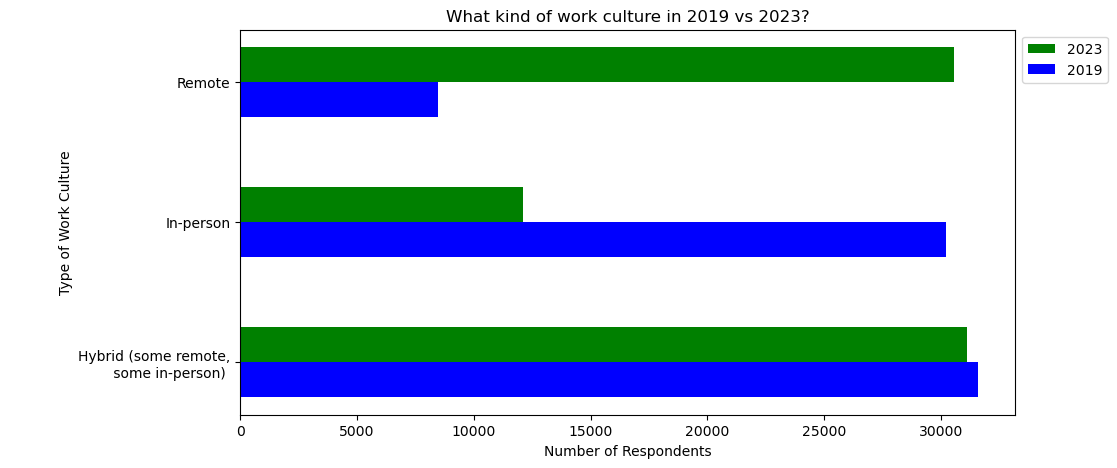

In [7]:
# Survey Data 2019 & 2023 - the bar chart of individuals in each RemoteWork category
fig, ax = plt.subplots(figsize = (10, 5))
index = np.arange(len(work2023_vals.index))
bar_width = 0.25
opacity = 0.8

ax.barh(index, work2023_vals, color='g', align='edge', height=bar_width, label="2023")
ax.barh(index, work2019_vals, color='b', align='edge', height=-bar_width, label='2019')

# assign the tick labels
ax.set_yticks(index)
ax.set_yticklabels(["Hybrid (some remote,\n some in-person) ", "In-person", "Remote"])

plt.ylabel('Type of Work Culture', wrap=True)
plt.xlabel('Number of Respondents')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("What kind of work culture in 2019 vs 2023?")
plt.show()

**Answer to Question 1:**  

Yes, there is significant increase on the number of respondents working from remote location (working from home) after global pandemic (2023) compared to pre global pandemic (2019), while the number of developers working onsite (work in office) drastically reduced at the same time. Hybrid work culture remains consistent.  


Next, we want to find out how remote work culture adopted by different countries after global pandemic.  
We need to
1. Add new variable as an indicator of respondents working remotely from home in order to calculate the proportion of developers remote work from home.
2. Create 1 horizontal bar charts to show top 10 countries with the highest proportion of developers remote work from home.
3. Create 1 horizontal bar charts to show top 10 countries with the highest proportion of developers work onsite

# Question 2: Which are the countries adopted remote work culture after global pandemic?

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_8007/2125929216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_rw['WorkFromHome'] =  df2023_rw['RemoteWork'].isin (['Remote', 'Hybrid (some remote,some in-person)'])


Text(0.5, 1.0, 'Top 10 Countries with The Highest Proportion of Developers Remote Work from Home')

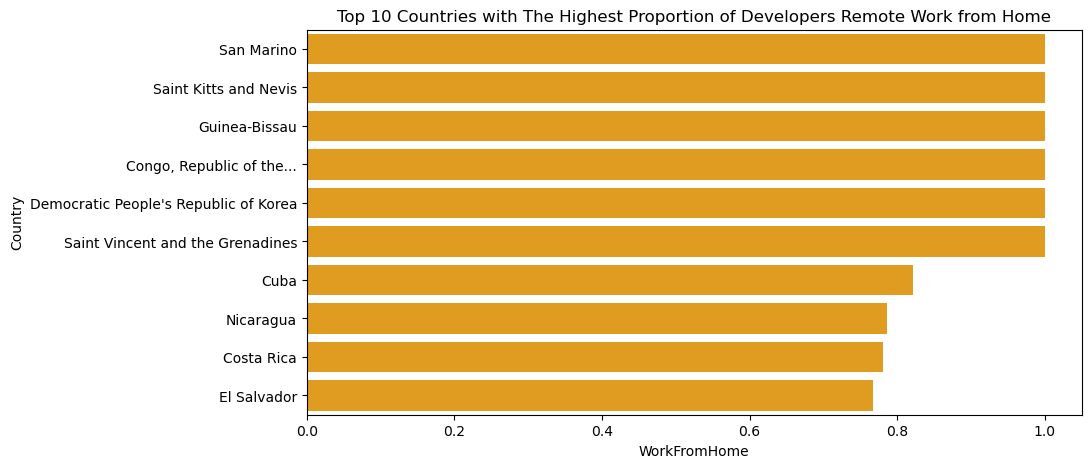

In [8]:
#Create new variable to indicate respondents are working remotely from home
df2023_rw['WorkFromHome'] =  df2023_rw['RemoteWork'].isin (['Remote', 'Hybrid (some remote,some in-person)'])
country_wfh = df2023_rw.groupby(['Country'])['WorkFromHome'].mean().sort_values(ascending = False)

plt.figure(figsize=[10,5])
sns.barplot(y=country_wfh.index, x=country_wfh, color='orange', order=country_wfh[:10].index)
plt.title("Top 10 Countries with The Highest Proportion of Developers Remote Work from Home")

**Answer to Question 2:**  

There are 6 countries - San Marino, Saint Kitts and Nevis, Guinea-Bissau, Congo, Korea and Saint Vincent and the Grenadines adopted remote work culture at workplace. Is there any country enforced strictly working in office environment for developers?   
Let's move on to the next graph.  



/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_8007/498829758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_rw['WorkOnsite'] =  df2023_rw['RemoteWork']== 'In-person'


Text(0.5, 1.0, 'Top 10 Countries with The Highest Proportion of Developers Working in Office')

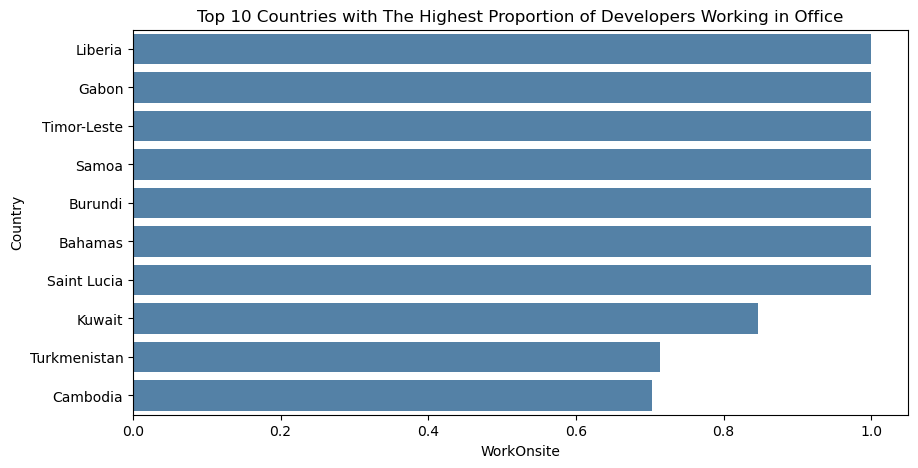

In [9]:
#Create new variable to indicate respondents are working onsite
df2023_rw['WorkOnsite'] =  df2023_rw['RemoteWork']== 'In-person'
country_onsite = df2023_rw.groupby(['Country'])['WorkOnsite'].mean().sort_values(ascending = False)

plt.figure(figsize=[10,5])
sns.barplot(y=country_onsite.index, x=country_onsite, color='steelblue', order=country_onsite[:10].index)
plt.title("Top 10 Countries with The Highest Proportion of Developers Working in Office")

Clearly, the global pandemic still doesn't change the work culture in certain countries. 100% developers in Liberia, Gabon, Timor-Leste, Samoa, Burundi, Bahamas and Saint Lucia are required to work in office. 

As global pandemic accelerates the adoption of technology across industries, we want to examine if there is an increase of developers around the world after global pandemic. In this dataset, students, part-timer and full-timer developer are included as developers even though some of them might not be drawing salary. We focus on counting number of developers with salary paid.

# Question 3: Is the number of developer increase after global pandemic?

Text(0.5, 1.0, 'Comparison of total developers paid in 2019 vs 2023')

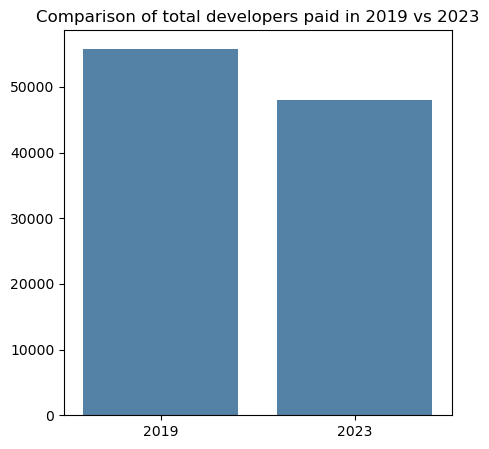

In [10]:
# Compare number of developers paid in 2019 vs 2023
total_dev = [df2019['ConvertedComp'].count(), df2023['ConvertedCompYearly'].count()]

plt.figure(figsize=[5,5])
sns.barplot(y=total_dev, x=['2019', '2023'], color='steelblue')
plt.title("Comparison of total developers paid in 2019 vs 2023")

**Answer to Question 3**  

In 2023, the number of developers slightly decreased compared to 2019. Let's take a closer look at country level.

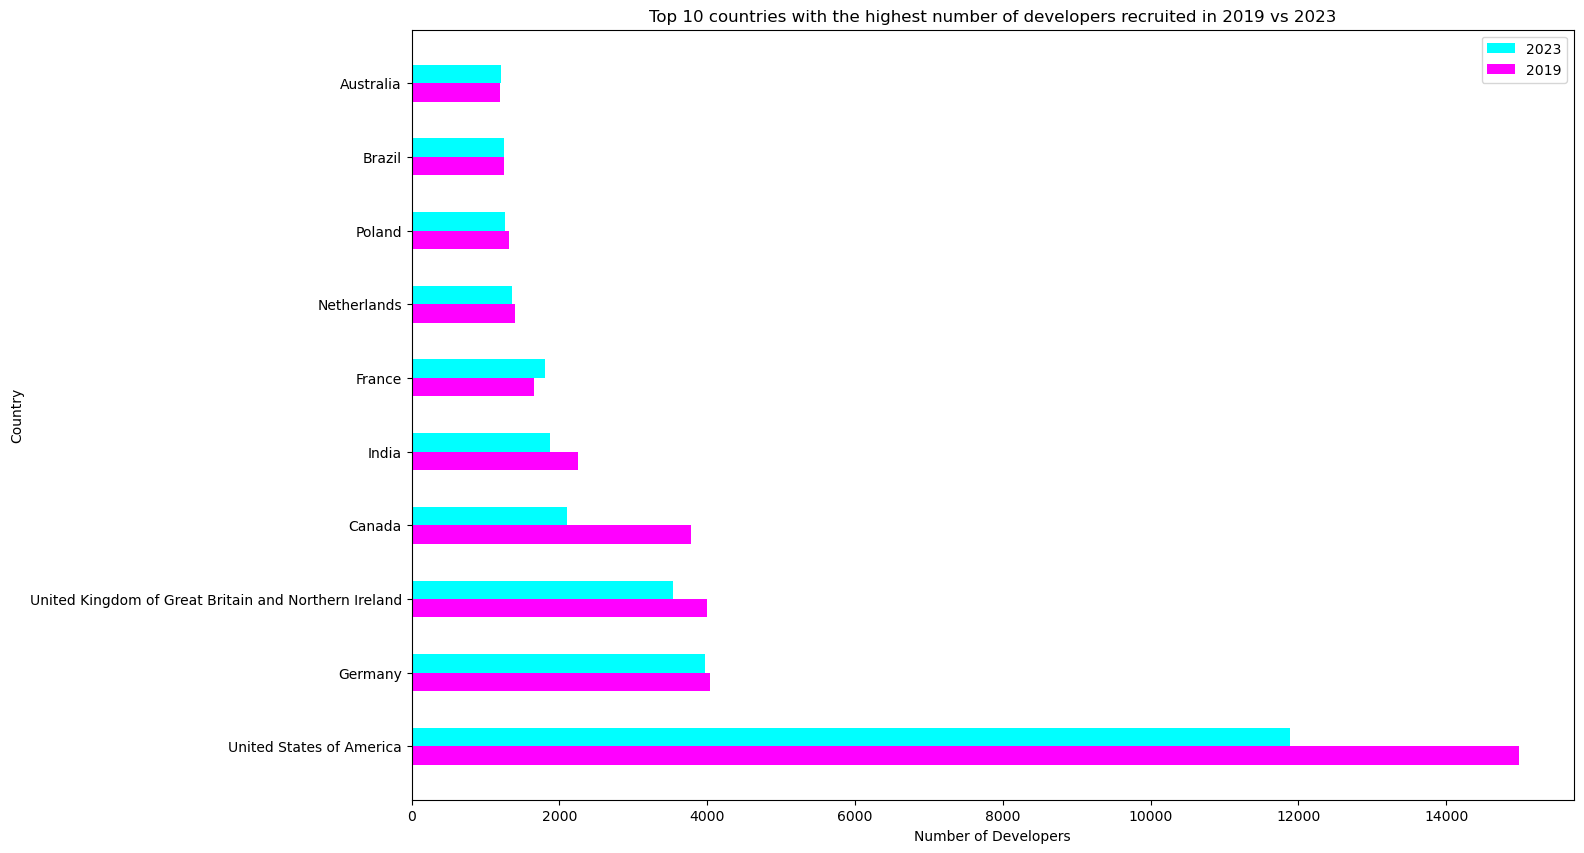

In [11]:
# Compare number of developers paid by each country
dev2023_vals = df2023.groupby(['Country'])['ConvertedCompYearly'].count().sort_values(ascending = False)
dev2019_vals = df2019.groupby(['Country'])['ConvertedComp'].count().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (15, 10))
index = np.arange(len(dev2023_vals[:10].index))
bar_width = 0.25
opacity = 0.8

ax.barh(index, dev2023_vals[:10], color='aqua', align='edge', height=bar_width, label="2023")
ax.barh(index, dev2019_vals[:10], color='magenta', align='edge', height=-bar_width, label='2019')

# assign the tick labels
ax.set_yticks(index)
ax.set_yticklabels(dev2023_vals[:10].index)

plt.xlabel('Number of Developers', wrap=True)
plt.ylabel('Country')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Top 10 countries with the highest number of developers recruited in 2019 vs 2023")
plt.show()

Often a correlation matrix can tell us which variables are related to one another. We plot a heatmap to check which quantitatives variables related to total compensation for developers in 2023.

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_8007/1392158625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2023.corr(), annot=True, fmt=".2f")


<Axes: >

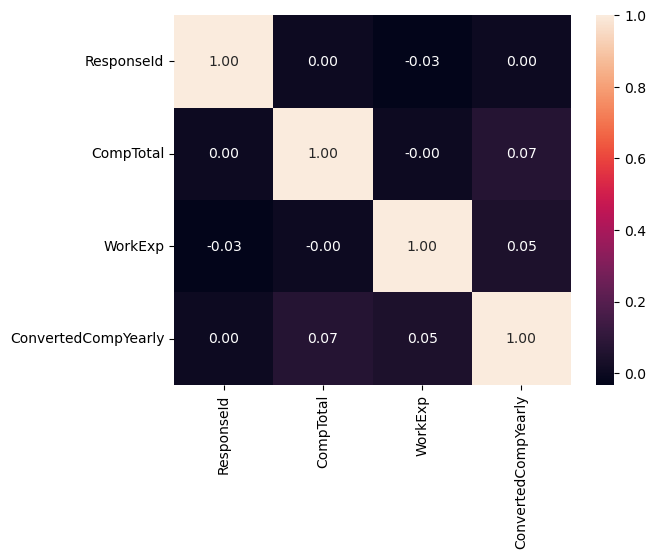

In [13]:
sns.heatmap(df2023.corr(), annot=True, fmt=".2f")

Now, we see the Survey 2023 data suggested work experience related to higher salary. Let's try to examine further.
1. Create a function to segregate years of coding experience for each respondent into respective range.
2. Calculate the average salary paid to developers.
3. Create a vertical bar chart to show the average salary paid by years of coding experience range.

In [14]:
# Remove rows associated with NaN values for YearsCodePro and ConvertedCompYearly / ConvertedComp columns
df2023 = df2023.dropna(subset=['YearsCodePro', 'ConvertedCompYearly'], axis=0)
df2019 = df2019.dropna(subset=['YearsCodePro', 'ConvertedComp'], axis=0)

In [15]:
def classify_years_code (df):
    """
    PURPOSE
        Classify age into new categorical variable - YearsCodeRange
    INPUT
        df - a dataframe with YearsCodePro column
    OUTPUT
        df - a dataframe with new variable - YearsCodeRange
    """

    for ind, val in df.iterrows():
        # Match each value to its respective category
        if val['YearsCodePro'] in ['1', '2', '3', '4', '5']:
            df.at[ind, 'YearsCodeRange'] = "1-5 years"
        elif val['YearsCodePro'] in ['6', '7', '8', '9', '10']:
            df.at[ind, 'YearsCodeRange'] = "6-10 years"
        elif val['YearsCodePro'] in ['11', '12', '13', '14', '15']:
            df.at[ind, 'YearsCodeRange'] = "11-15 years"
        elif val['YearsCodePro'] in ['16', '17', '18', '19', '20']:
            df.at[ind, 'YearsCodeRange'] = "16-20 years"
        elif val['YearsCodePro'] in ['21', '22', '23', '24', '25']:
            df.at[ind, 'YearsCodeRange'] = "21-25 years"
        elif val['YearsCodePro'] in ['26', '27', '28', '29', '30']:
            df.at[ind, 'YearsCodeRange'] = "26-30 years"
        elif val['YearsCodePro'] in ("Less than 1 year", "More than 60 years"):
            df.at[ind, 'YearsCodeRange'] = val['YearsCodePro']
        else:
            df.at[ind, 'YearsCodeRange'] = "More than 30 years"

    return df

In [16]:
# Calculate the average salary in each years of coding category in Survey Data 2019
df2019_yc = classify_years_code(df2019)
yearscode2019 = df2019_yc.groupby(['YearsCodeRange']).mean()['ConvertedComp'].sort_values().dropna()

# Calculate the average salary in each years of coding category in Survey Data 2023
df2023_yc = classify_years_code(df2023)
yearscode2023 = df2023_yc.groupby(['YearsCodeRange']).mean()['ConvertedCompYearly'].sort_values().dropna()

/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_8007/3588809782.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearscode2019 = df2019_yc.groupby(['YearsCodeRange']).mean()['ConvertedComp'].sort_values().dropna()
/var/folders/q4/z_6r7_6108v70lxqqkhcvyx40000gn/T/ipykernel_8007/3588809782.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearscode2023 = df2023_yc.groupby(['YearsCodeRange']).mean()['ConvertedCompYearly'].sort_values().dropna()


Index(['1-5 years', '6-10 years', 'Less than 1 year', '11-15 years',
       '16-20 years', '26-30 years', '21-25 years', 'More than 30 years'],
      dtype='object', name='YearsCodeRange')


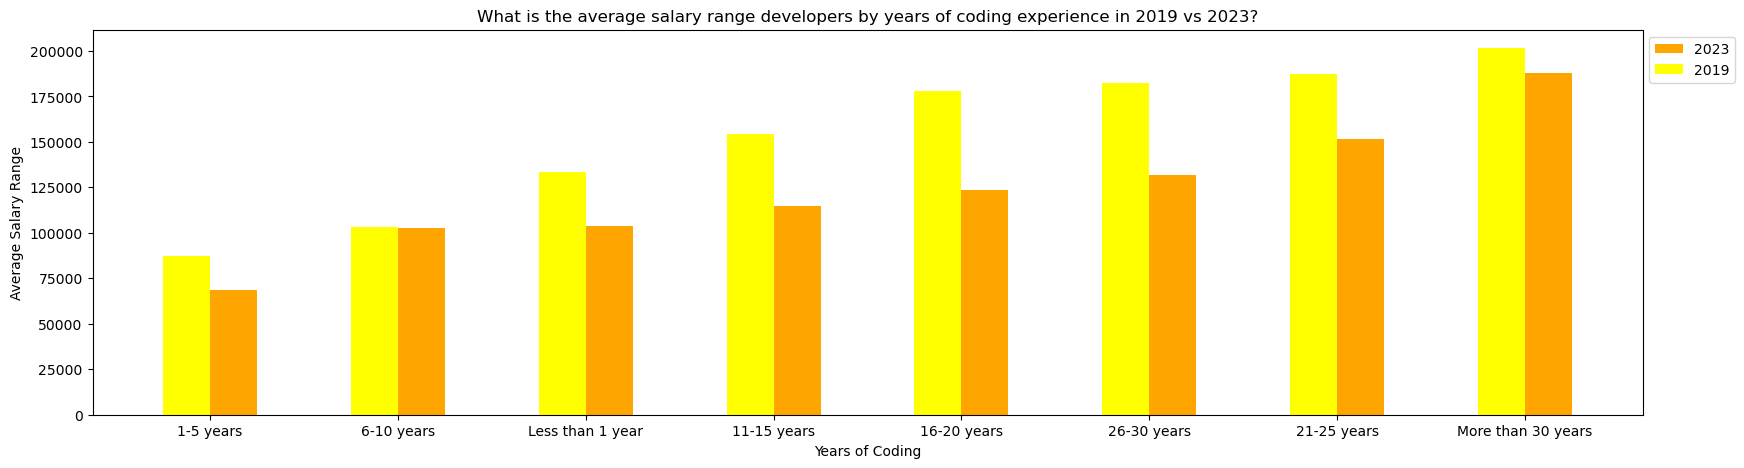

In [17]:
fig, ax = plt.subplots(figsize = (20, 5))
index = np.arange(len(yearscode2023.index))
print(yearscode2023.index)
bar_width = 0.25
opacity = 0.8

ax.bar(index, yearscode2023, color='orange', align='edge', width=bar_width, label="2023")
ax.bar(index, yearscode2019, color='yellow', align='edge', width=-bar_width, label='2019')

# assign the tick labels
ax.set_xticks(index)
ax.set_xticklabels(yearscode2023.index)

plt.ylabel('Average Salary Range', wrap=True)
plt.xlabel('Years of Coding')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("What is the average salary range developers by years of coding experience in 2019 vs 2023?")
plt.show()

Obviously, the developers with higher number of years of coding experience draw higher salary. 

# Evaluation

Based on the outcome of analysis, we observed
1. The trend of work culture shifted from onsite work only before pandemic to fully work from home after pandemic. The hybrid work culture remains consistent and it is hardly reverse.
2. Some countries promote 100% remote work while some maintains 100% work onsite.
3. There is a decrease of developers after global pandemic. However, the years of coding correlates to the total compensation given to developers. It is clearly more experienced developers drawing higher salary.